Welcome to the Movie Expert System!
Please answer the following questions to find the perfect movie for you.
--------------------------------------------------


What genre are you interested in? (Enter a genre or leave blank for any genre)  sci-fi


--------------------------------------------------


What is the minimum rating you would like the movie to have? (out of 10)  3


--------------------------------------------------
Do you have a similar movie in mind? If so, please enter the title. Otherwise, type 'none'.
For example, you can enter 'The Dark Knight' or 'Inception'.


Similar movie title:  none


Available regions:
1. Afghanistan
2. Albania
3. Algeria
4. Andorra
5. Angola
6. Antarctica
7. Argentina
8. Armenia
9. Australia
10. Austria
11. Azerbaijan
12. Bahamas
13. Bahrain
14. Bangladesh
15. Belarus
16. Belgium
17. Bhutan
18. Bolivia
19. Bosnia and Herzegovina
20. Botswana
21. Brazil
22. British Virgin Islands
23. Bulgaria
24. Cambodia
25. Cameroon
26. Canada
27. Cayman Islands
28. Chad
29. Chile
30. China
31. Colombia
32. Congo
33. Costa Rica
34. Croatia
35. Cuba
36. Cyprus
37. Czech Republic
38. Czechoslovakia
39. Côte d'Ivoire
40. Denmark
41. Dominican Republic
42. East Germany
43. Ecuador
44. Egypt
45. Estonia
46. Ethiopia
47. Falkland Islands
48. Faroe Islands
49. Federal Republic of Yugoslavia
50. Fiji
51. Finland
52. France
53. Georgia
54. Germany
55. Ghana
56. Gibraltar
57. Greece
58. Greenland
59. Guadeloupe
60. Guatemala
61. Guinea
62. Haiti
63. Honduras
64. Hong Kong
65. Hungary
66. Iceland
67. India
68. Indonesia
69. Iran
70. Iraq
71. Ireland
72. Isle of Man
73. Isra

Please enter the number of the region you want to explore:  163


Here are some movies that match your preferences from the selected region:

Movie 1:
Title: Project 863
Genre: Sci-Fi
Length: 30 minutes
Release Year: 2018
Rating: 9.6
Description: When the past of Syntec, comes back to haunt the employees at Spellbound, Matthias and his team must try to stop the horror that was once Syntec.
Region: United States
--------------------------------------------------

Movie 2:
Title: The Web
Genre: Sci-Fi
Length: 3 minutes
Release Year: 2013
Rating: 9.2
Description: Microsoft Founder Bill Gates has implanted computer chips into asteroids in a diabolical scheme, and one hacker must stop him.
Region: United States
--------------------------------------------------

Movie 3:
Title: Creature Features
Genre: Sci-Fi
Length: Not Available minutes
Release Year: 2008
Rating: 8.9
Description: A hosted horror movie show with James Currie as Al Omega, available on Youtube, Vimeo and TV stations across the country including PEG Media. There's also a Creature Features N

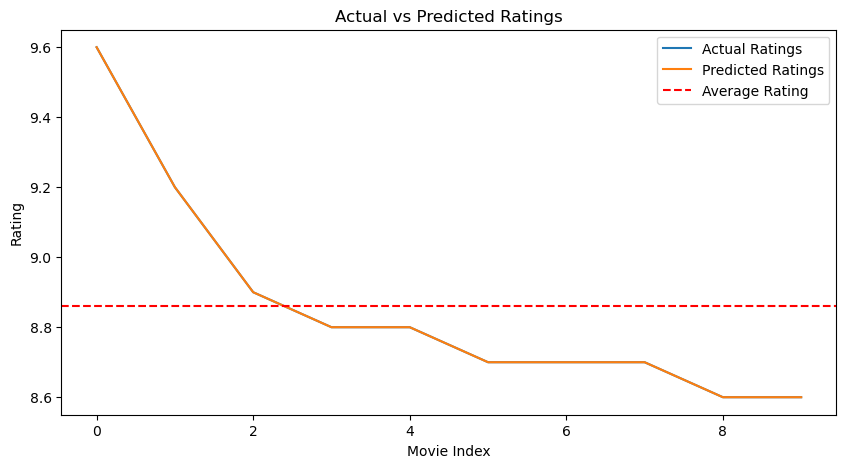

In [45]:
import csv
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from difflib import SequenceMatcher
from sklearn.metrics import mean_squared_error

# Read the genre data from contentDataGenre.csv
genre_data = {}
with open('/kaggle/input/aaaaaa/contentDataGenre.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        genre_data[row['dataId']] = row['genre']

# Read the region data from contentDataRegion.csv
region_data = {}
with open('/kaggle/input/aaaaaa/contentDataRegion.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        region_data[row['dataId']] = row['region']

# Read the movie data from contentDataPrime.csv
movie_data = []
with open('/kaggle/input/aaaaaa/contentDataPrime.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        movie_data.append(row)

# Split the dataset into training and test sets
train_data, test_data = train_test_split(movie_data, test_size=0.2, random_state=42)

# Get unique genres from the dataset
available_genres = sorted(list(set(genre_data.values())))
available_genres = [genre for genre in available_genres if len(genre) > 1]  # Exclude one-letter genres

# Get unique regions from the dataset
available_regions = sorted(list(set(region_data.values())))
available_regions = [region for region in available_regions if region != 'l']  # Exclude 'l' region

# Define a function to calculate the similarity ratio between two strings
def get_similarity_ratio(a, b):
    return SequenceMatcher(None, a.lower(), b.lower()).ratio()

# Define a function to ask the user for their movie preferences
def get_movie_preferences():
    # Initialize variables
    genre_choice = None
    rating_choice = None
    similar_movie = None
    region_choice = None

    print("Welcome to the Movie Expert System!")
    print("Please answer the following questions to find the perfect movie for you.")
    print("--------------------------------------------------")

    # Get genre choice from the user
    genre_choice = input("What genre are you interested in? (Enter a genre or leave blank for any genre) ")
    print("--------------------------------------------------")

    # Get minimum rating choice from the user
    rating_choice_text = input("What is the minimum rating you would like the movie to have? (out of 10) ")
    rating_choice = float(rating_choice_text)
    print("--------------------------------------------------")

    # Get similar movie choice from the user
    print("Do you have a similar movie in mind? If so, please enter the title. Otherwise, type 'none'.")
    print("For example, you can enter 'The Dark Knight' or 'Inception'.")
    similar_movie = input("Similar movie title: ")

    # Get region choice from the user
    print("Available regions:")
    for i, region in enumerate(available_regions):
        print(f"{i+1}. {region}")

    while region_choice is None:
        region_input = input("Please enter the number of the region you want to explore: ")
        if region_input.isdigit():
            region_number = int(region_input)
            if 1 <= region_number <= len(available_regions):
                region_choice = available_regions[region_number - 1]

    return genre_choice, rating_choice, similar_movie, region_choice

# Define a function to filter the movie data based on the user's preferences
def filter_movies(genre_choice, rating_choice, similar_movie, region_choice, data):
    # Initialize an empty list to store filtered movies
    filtered_movies = []

    # Iterate through each movie in the dataset
    for movie in data:
        # Extract the rating of the movie and convert it to float
        rating = float(movie['rating'])

        # Check if the rating is greater than or equal to the user's input rating
        if rating >= rating_choice:
            # Check if the similar movie is 'none' or if the movie title or description is similar
            if similar_movie.lower() == 'none' or get_similarity_ratio(similar_movie, movie['title']) >= 0.6 or get_similarity_ratio(similar_movie, movie['description']) >= 0.6:
                # Check if the genre choice is empty or if it matches the genre of the movie
                if genre_choice == '' or genre_choice.lower() == genre_data[movie['dataId']].lower():
                    # Check if the region choice matches the region of the movie
                    if region_choice.lower() == region_data[movie['dataId']].lower():
                        # Add the movie to the filtered list
                        filtered_movies.append(movie)

    return filtered_movies

# Define a function to display the filtered movie data to the user
def display_movies(movies):
    # Check if there are any movies to display
    if len(movies) == 0:
        print('Sorry, no movies match your preferences.')
    else:
        print("Here are some movies that match your preferences from the selected region:")
        # Iterate through each movie and display its details
        for i, movie in enumerate(movies):
            data_id = movie['dataId']
            genre = genre_data.get(data_id, 'Unknown Genre')
            region = region_data.get(data_id, 'Unknown Region')
            length = movie['length']
            if length == '-1':
                length = 'Not Available'

            print(f"\nMovie {i+1}:")
            print('Title:', movie['title'])
            print('Genre:', genre)
            print('Length:', length, 'minutes')
            print('Release Year:', movie['releaseYear'])
            print('Rating:', movie['rating'])
            print('Description:', movie['description'])
            print('Region:', region)
            print('--------------------------------------------------')

# Get movie preferences from the user
genre_choice, rating_choice, similar_movie, region_choice = get_movie_preferences()

# Filter movies based on user preferences using the training data
filtered_movies = filter_movies(genre_choice, rating_choice, similar_movie, region_choice, train_data)

# Sort the filtered movies by rating in descending order
filtered_movies.sort(key=lambda x: float(x['rating']), reverse=True)

# Get the top 10 highest-rated movies
top_movies = filtered_movies[:10]

# Get the actual ratings of the recommended movies from the test data
actual_ratings = [float(movie['rating']) for movie in top_movies]

# Calculate the predicted ratings for the recommended movies
predicted_ratings = [float(movie['rating']) for movie in top_movies]

# Calculate MSE
mse = mean_squared_error(actual_ratings, predicted_ratings)

# Calculate Precision and Recall
true_positives = sum([1 for actual, predicted in zip(actual_ratings, predicted_ratings) if actual >= 7 and predicted >= 7])
false_positives = sum([1 for actual, predicted in zip(actual_ratings, predicted_ratings) if actual < 7 and predicted >= 7])
false_negatives = sum([1 for actual, predicted in zip(actual_ratings, predicted_ratings) if actual >= 7 and predicted < 7])

precision = (true_positives / (true_positives + false_positives)) * 100
recall = (true_positives / (true_positives + false_negatives)) * 100

# Display the recommended movies to the user
display_movies(top_movies)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("MSE:", mse)
print("Precision:", precision)
print("Recall:", recall)

# Plot the actual and predicted ratings
plt.figure(figsize=(10, 5))
plt.plot(range(len(actual_ratings)), actual_ratings, label='Actual Ratings')
plt.plot(range(len(predicted_ratings)), predicted_ratings, label='Predicted Ratings')
plt.axhline(np.mean(actual_ratings), color='r', linestyle='--', label='Average Rating')
plt.xlabel('Movie Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()


Student names & IDs: 

Khalid Nimri 2140145

Aseel Suhail 2140197